<a href="https://colab.research.google.com/github/kemar-khan/hey-tm/blob/main/ai_tm_force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating Variation of "Hey TM"**

In [1]:
# --- Install dependencies ---
!pip install pydub librosa soundfile audiomentations -q

import os
import librosa
import soundfile as sf
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# --- Settings ---
input_file = "hey_tm_sample.m4a"     # Your input file
output_dir = "augmented_chunks"      # Folder to save results
chunk_duration = 5                   # seconds
variations_per_chunk = 3             # how many variations per chunk

# Create output folder
os.makedirs(output_dir, exist_ok=True)

# --- Load audio ---
y, sr = librosa.load(input_file, sr=None)  # y = waveform, sr = sample rate
total_duration = librosa.get_duration(y=y, sr=sr)

# --- Define augmentations pipeline ---
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.9, max_rate=1.1, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
    Shift(p=0.5)   # default shift (no min/max_fraction needed in new version)
])

# --- Process chunks ---
chunk_samples = chunk_duration * sr
num_chunks = int(len(y) / chunk_samples)

print(f"Total duration: {total_duration:.2f}s")
print(f"Splitting into {num_chunks} chunks of {chunk_duration}s each...")

for i in range(num_chunks):
    start = i * chunk_samples
    end = start + chunk_samples
    chunk = y[start:end]

    for v in range(variations_per_chunk):
        augmented_chunk = augment(samples=chunk, sample_rate=sr)
        filename = f"chunk_{i+1}_var{v+1}.wav"
        filepath = os.path.join(output_dir, filename)
        sf.write(filepath, augmented_chunk, sr)
        print(f"Saved: {filepath}")

print("✅ All chunks processed with variations!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 11.9 MB/s eta 0:00:00


/tmp/ipython-input-1982442451.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(input_file, sr=None)  # y = waveform, sr = sample rate
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Total duration: 182.85s
Splitting into 36 chunks of 5s each...
Saved: augmented_chunks/chunk_1_var1.wav
Saved: augmented_chunks/chunk_1_var2.wav
Saved: augmented_chunks/chunk_1_var3.wav
Saved: augmented_chunks/chunk_2_var1.wav
Saved: augmented_chunks/chunk_2_var2.wav
Saved: augmented_chunks/chunk_2_var3.wav
Saved: augmented_chunks/chunk_3_var1.wav
Saved: augmented_chunks/chunk_3_var2.wav
Saved: augmented_chunks/chunk_3_var3.wav
Saved: augmented_chunks/chunk_4_var1.wav
Saved: augmented_chunks/chunk_4_var2.wav
Saved: augmented_chunks/chunk_4_var3.wav
Saved: augmented_chunks/chunk_5_var1.wav
Saved: augmented_chunks/chunk_5_var2.wav
Saved: augmented_chunks/chunk_5_var3.wav
Saved: augmented_chunks/chunk_6_var1.wav
Saved: augmented_chunks/chunk_6_var2.wav
Saved: augmented_chunks/chunk_6_var3.wav
Saved: augmented_chunks/chunk_7_var1.wav
Saved: augmented_chunks/chunk_7_var2.wav
Saved: augmented_chunks/chunk_7_var3.wav
Saved: augmented_chunks/chunk_8_var1.wav
Saved: augmented_chunks/chunk_8_var

In [2]:
# --- Install dependencies ---
!pip install pydub librosa soundfile audiomentations -q

import os
from pydub import AudioSegment
import librosa
import soundfile as sf
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from google.colab import files

# --- Upload your hey_tm_sample.m4a file ---
uploaded = files.upload()

# --- Load audio ---
input_file = "hey_tm_sample.m4a"  # make sure name matches uploaded file
audio = AudioSegment.from_file(input_file, format="m4a")

# --- Split into chunks (e.g., 3 seconds each) ---
chunk_length = 3000  # milliseconds
chunks = [audio[i:i+chunk_length] for i in range(0, len(audio), chunk_length)]

# --- Define augmentations ---
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.9, max_rate=1.1, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
    Shift(min_shift=-0.2, max_shift=0.2, p=0.5),
])

# --- Make folder for results ---
os.makedirs("chunk_variations", exist_ok=True)

# --- Process each chunk ---
variation_per_chunk = 5  # e.g., 5 variations per chunk
for idx, chunk in enumerate(chunks):
    # Save the base chunk first
    chunk_path = f"chunk_variations/chunk_{idx}.wav"
    chunk.export(chunk_path, format="wav")

    # Load chunk with librosa
    samples, sample_rate = librosa.load(chunk_path, sr=None)

    # Generate variations for this chunk
    for v in range(variation_per_chunk):
        augmented = augment(samples=samples, sample_rate=sample_rate)
        out_path = f"chunk_variations/chunk_{idx}_var_{v+1}.wav"
        sf.write(out_path, augmented, sample_rate)

    print(f"✅ Finished chunk {idx}, saved base + {variation_per_chunk} variations")

print("🎉 All chunks done! Check 'chunk_variations' folder.")


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Saving hey_tm_sample.m4a to hey_tm_sample (1).m4a
✅ Finished chunk 0, saved base + 5 variations
✅ Finished chunk 1, saved base + 5 variations
✅ Finished chunk 2, saved base + 5 variations
✅ Finished chunk 3, saved base + 5 variations
✅ Finished chunk 4, saved base + 5 variations
✅ Finished chunk 5, saved base + 5 variations
✅ Finished chunk 6, saved base + 5 variations
✅ Finished chunk 7, saved base + 5 variations
✅ Finished chunk 8, saved base + 5 variations
✅ Finished chunk 9, saved base + 5 variations
✅ Finished chunk 10, saved base + 5 variations
✅ Finished chunk 11, saved base + 5 variations
✅ Finished chunk 12, saved base + 5 variations
✅ Finished chunk 13, saved base + 5 variations
✅ Finished chunk 14, saved base + 5 variations
✅ Finished chunk 15, saved base + 5 variations
✅ Finished chunk 16, saved base + 5 variations
✅ Finished chunk 17, saved base + 5 variations
✅ Finished chunk 18, saved base + 5 variations
✅ Finished chunk 19, saved base + 5 variations
✅ Finished chunk 20,

# **Generating Negative Samples**

In [4]:
!pip install pydub gtts -q

from pydub import AudioSegment
from pydub.generators import WhiteNoise, Sine
from gtts import gTTS
import random, os

# --- Settings ---
NEGATIVE_SAMPLES = 300
duration_ms = 2000  # 2 seconds each
output_dir = "negative_samples"
os.makedirs(output_dir, exist_ok=True)

def generate_negative_sample(idx):
    choice = random.choice(["silence", "noise", "tone", "speech"])

    if choice == "silence":
        audio = AudioSegment.silent(duration=duration_ms)

    elif choice == "noise":
        audio = WhiteNoise().to_audio_segment(duration=duration_ms, volume=random.randint(-25, -10))

    elif choice == "tone":
        freq = random.choice([220, 440, 880])  # A few different tones
        audio = Sine(freq).to_audio_segment(duration=duration_ms, volume=-15)

    elif choice == "speech":
        word = random.choice(["hello", "computer", "test", "openai", "goodbye"])
        tts = gTTS(word, lang="en")
        tmp_path = f"{output_dir}/tmp_{idx}.mp3"
        tts.save(tmp_path)
        audio = AudioSegment.from_mp3(tmp_path)
        os.remove(tmp_path)

    # Export sample
    out_path = f"{output_dir}/neg_{idx}.wav"
    audio.export(out_path, format="wav")

# --- Generate all negative samples ---
for i in range(NEGATIVE_SAMPLES):
    generate_negative_sample(i)

print(f"✅ Generated {NEGATIVE_SAMPLES} negative samples in '{output_dir}' folder")


✅ Generated 300 negative samples in 'negative_samples' folder


# **Training Model**

1. Install + Import Necessary Library

In [5]:
!pip install librosa tensorflow soundfile -q


2. Preprocess Audio -> Mel Spectograms

In [10]:
import librosa
import numpy as np
import os

def extract_features(file_path, label):
    try:
        # Load audio
        y, sr = librosa.load(file_path, sr=None)
        if len(y) == 0:
            print(f"⚠️ Skipped empty file: {file_path}")
            return None, None

        # Extract MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfcc_scaled = np.mean(mfcc.T, axis=0)

        return mfcc_scaled, label

    except Exception as e:
        print(f"❌ Error with file {file_path}: {e}")
        return None, None

# --- Paths to your datasets (inside "dataset" folder) ---
dataset_dir = "dataset"
positive_dir = os.path.join(dataset_dir, "positive_samples")
negative_dir = os.path.join(dataset_dir, "negative_samples")

features = []
labels = []

# --- Process positive samples ---
for file in os.listdir(positive_dir):
    file_path = os.path.join(positive_dir, file)
    f, l = extract_features(file_path, 1)
    if f is not None:
        features.append(f)
        labels.append(l)
    else:
        print(f"Skipped (positive): {file_path}")

# --- Process negative samples ---
for file in os.listdir(negative_dir):
    file_path = os.path.join(negative_dir, file)
    f, l = extract_features(file_path, 0)
    if f is not None:
        features.append(f)
        labels.append(l)
    else:
        print(f"Skipped (negative): {file_path}")

features = np.array(features)
labels = np.array(labels)

print("✅ Debug Summary")
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)


✅ Debug Summary
Features shape: (671, 40)
Labels shape: (671,)


3. Train + Test Split

In [12]:
from sklearn.model_selection import train_test_split

# --- Assuming you already have features & labels from step 3 ---
print("✅ Debug Summary before splitting")
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

# --- Split dataset into train/test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels
)

print("\n✅ After train/test split:")
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


✅ Debug Summary before splitting
Features shape: (671, 40)
Labels shape: (671,)

✅ After train/test split:
Training set: (536, 40) (536,)
Test set: (135, 40) (135,)


4. Build & Train Model

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# --- Build model ---
model = models.Sequential([
    layers.Input(shape=(40,)),                        # 40 MFCC features
    layers.Dense(128, activation="relu"),             # hidden layer
    layers.Dropout(0.3),                              # prevent overfitting
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")             # binary classification
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# --- Train model ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

# --- Evaluate model ---
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Model accuracy on test set: {acc:.2%}")


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5152 - loss: 18.4344 - val_accuracy: 0.9630 - val_loss: 0.0739
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7319 - loss: 6.4112 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8084 - loss: 2.9611 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8882 - loss: 1.1542 - val_accuracy: 1.0000 - val_loss: 9.5196e-04
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9083 - loss: 0.9944 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9143 - loss: 0.9565 - val_accuracy: 1.0000 - val_loss: 4.0946e-04
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9468 - loss: 0.4332 - val_accuracy: 1.0000 - val_loss: 4.2420e-04
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9499 - loss: 0.3527 - val_accuracy:

5. Evaluate & Visualize Training

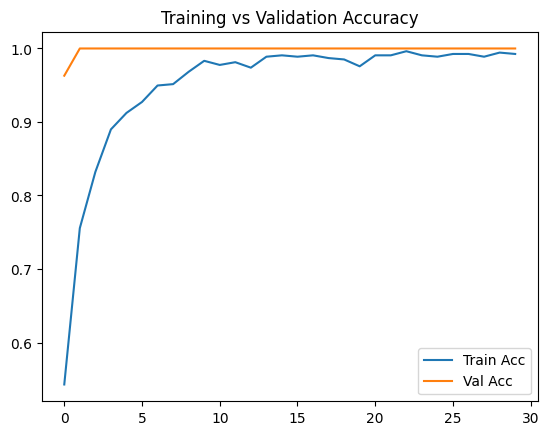

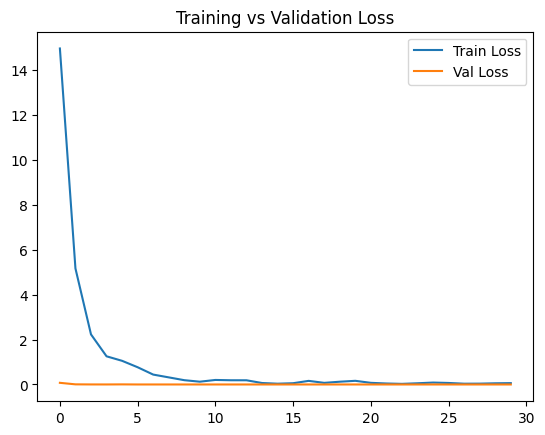

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


6. Save the generated Model

In [15]:
model.save("hey_tm_model.h5")


7. Convert model into TFLite (For Flutter Purpose)

In [16]:
import tensorflow as tf

# Load your Keras model
model = tf.keras.models.load_model("hey_tm_model.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("hey_tm_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved as hey_tm_model.tflite")


Saved artifact at '/tmp/tmpr2rgk29v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 40), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136942624248784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136942624253008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136942624253200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136942624253776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136942624254352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136942624254928: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved as hey_tm_model.tflite


## **Model - Data Visualization**

1. Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


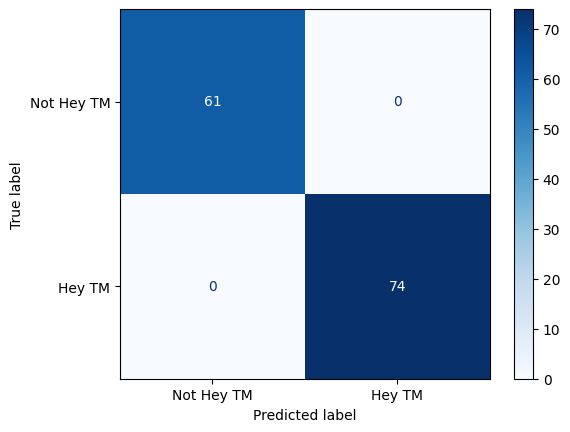

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_labels = [1 if p >= 0.5 else 0 for p in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Hey TM", "Hey TM"])
disp.plot(cmap='Blues')


2. Prediction Probability Histogram

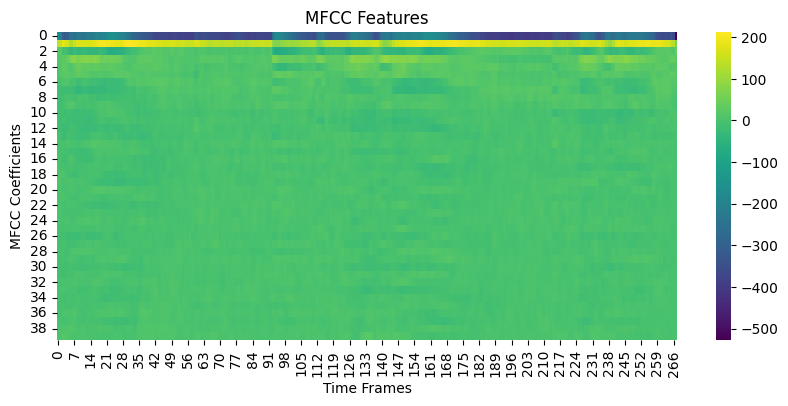

In [21]:
import seaborn as sns

mfcc = librosa.feature.mfcc(y=samples, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
sns.heatmap(mfcc, cmap='viridis')
plt.title("MFCC Features")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.show()


3. Learning Curves

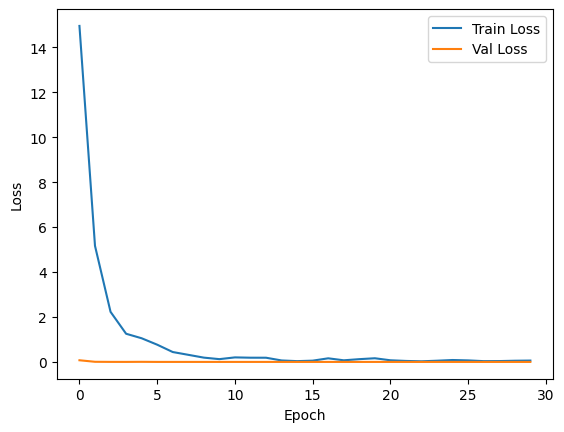

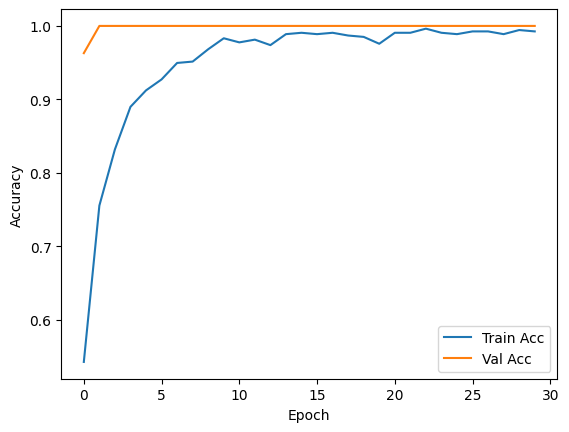

In [22]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
